In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

df = pd.read_csv('filtered.csv')
df.head(5)

,x,y,y_xg,y_exp,y_ma
0,1.000000,4.730981,5.542108,6.634706,NaN
1,1.000694,4.440981,5.528904,6.615669,NaN
2,1.001389,5.030981,5.516311,6.593922,NaN
3,1.002083,5.080981,5.504328,6.578292,NaN
4,1.002778,5.180981,5.492956,6.563319,4.892981


In [61]:
def get_moving_avg(y, window_size):
    # window_size = 50
    return pd.Series(y).rolling(window=window_size).mean()


def block_mean(original_array, k):
    original_array = np.array(original_array)
    # Calculate the number of blocks
    num_blocks = len(original_array) // k
    
    # Reshape the original array into blocks of size k
    blocks = original_array[:num_blocks*k].reshape(num_blocks, k)
    
    # Calculate the mean for each block
    mean_array = np.mean(blocks, axis=1)
    
    return mean_array

In [17]:
def plot(x, y, label='', fig_size=15):
    
    fig = plt.figure(figsize=(fig_size, fig_size/2))
    plt.plot(x, y, label=label)
    plt.show()

In [82]:
from scipy import fftpack
from functools import partial

def building_plots (x, y):
    x = np.array(x)
    y = np.array(y)
    sig_fft = fftpack.fft(y)
    fig, ax = plt.subplots()
    ax.set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
    ax.plot(x, sig_fft)

    

In [80]:

# data_y = block_mean(df.y, 137)
# data_x = np.linspace(1, 15, len(data_y))
# plot(data_x, data_y)
# building_plots(data_x, data_y)

c:\Users\Admin\anaconda3\envs\env2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Admin\anaconda3\envs\env2\lib\site-packages\matplotlib\scale.py:154: RuntimeWarning: overflow encountered in power
  return self._forward(values)
c:\Users\Admin\anaconda3\envs\env2\lib\site-packages\matplotlib\scale.py:154: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


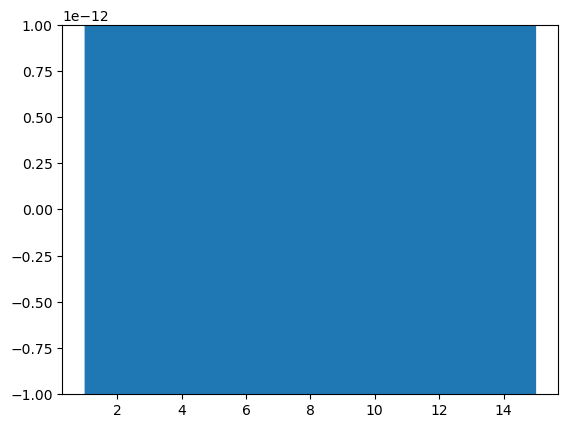

In [83]:
building_plots(df.x, df.y)

In [84]:
14 * 24 * 60

20160

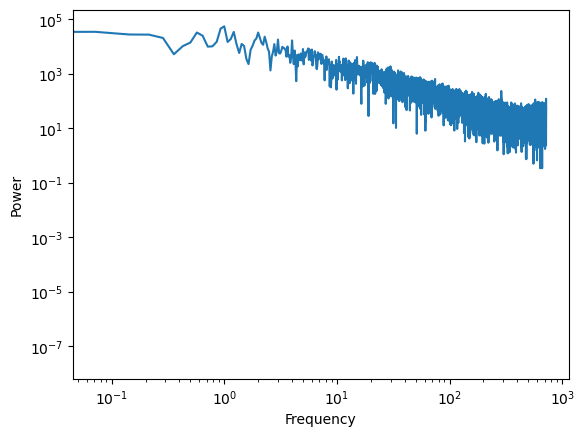

In [127]:
yf = sp.fft.fft(np.array(df.y))
duration = 14
sample_rate = 24 * 60
xf = sp.fft.fftfreq(20160, 1 / sample_rate)
fig_size = 15

fig, ax = plt.subplots()
# ax.set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
# ax.set_xscale('function', functions=(partial(np.power, 10.0), np.log10))
# plt.plot(xf, np.abs(yf))
plt.plot(xf[20160//2 - 100000 + 10 : 20160//2], np.abs(yf)[20160//2 - 100000 + 10 : 20160//2 ])
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [107]:
a = [1,2,3,4,5]
a[2:2]

[]

In [24]:
import numpy as np
from scipy.fft import fft, ifft

def low_pass_filter(signal, sample_rate, cutoff_freq):
    signal = np.array(signal)
    # FFT
    fft_signal = fft(signal)
    # Number of signal points
    N = len(signal)
    # Frequency array
    freq = np.fft.fftfreq(N, d=1/sample_rate)
    
    # Suppress high frequencies
    fft_signal[np.abs(freq) > cutoff_freq] = 0
    
    # IFFT
    filtered_signal = ifft(fft_signal)
    
    return filtered_signal.real  # Return the real part of the inverse FFT

data = low_pass_filter(df.y, 1.2, 20)
# plot(df.x, data)

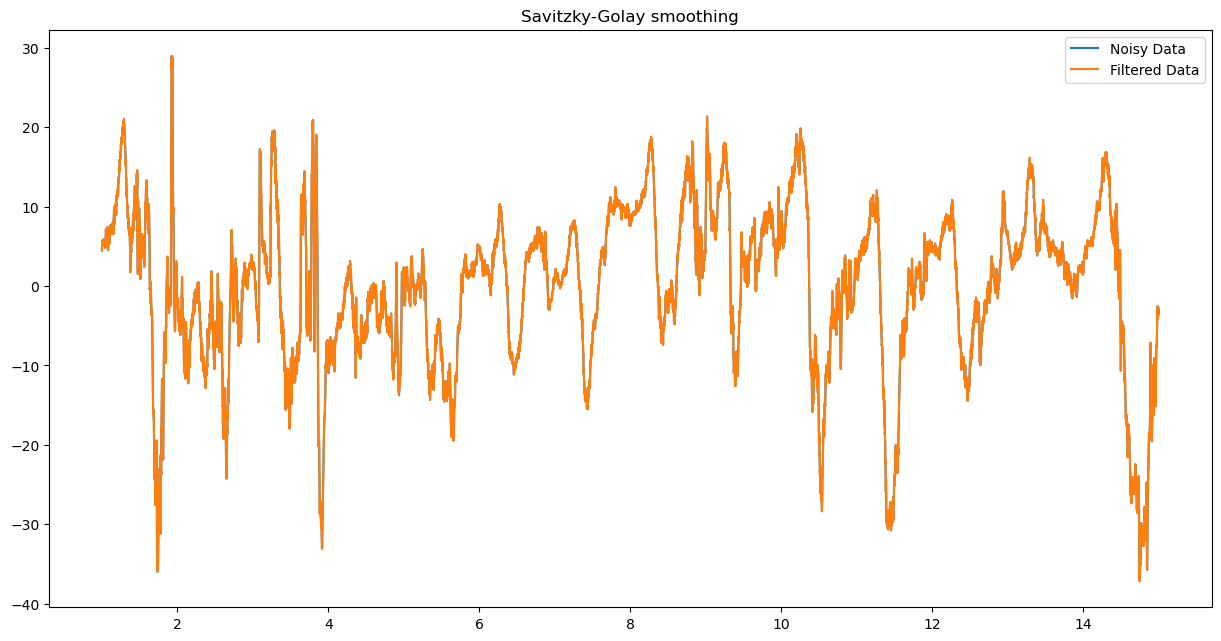

In [25]:
fig_size = 15
fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(df.x, df.y, label='Noisy Data')
plt.plot(df.x, data, label='Filtered Data')
plt.title('Savitzky-Golay smoothing')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

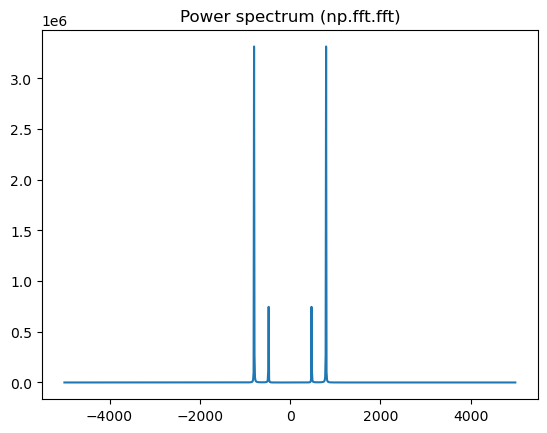

In [68]:
a = np.arange(1,100,0.1)
b = 2 * np.sin(3*a) + 4 * np.sin(5*a)
alpha = 10e3

freqs = np.fft.fftfreq(a.size, 1/alpha)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(b))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')

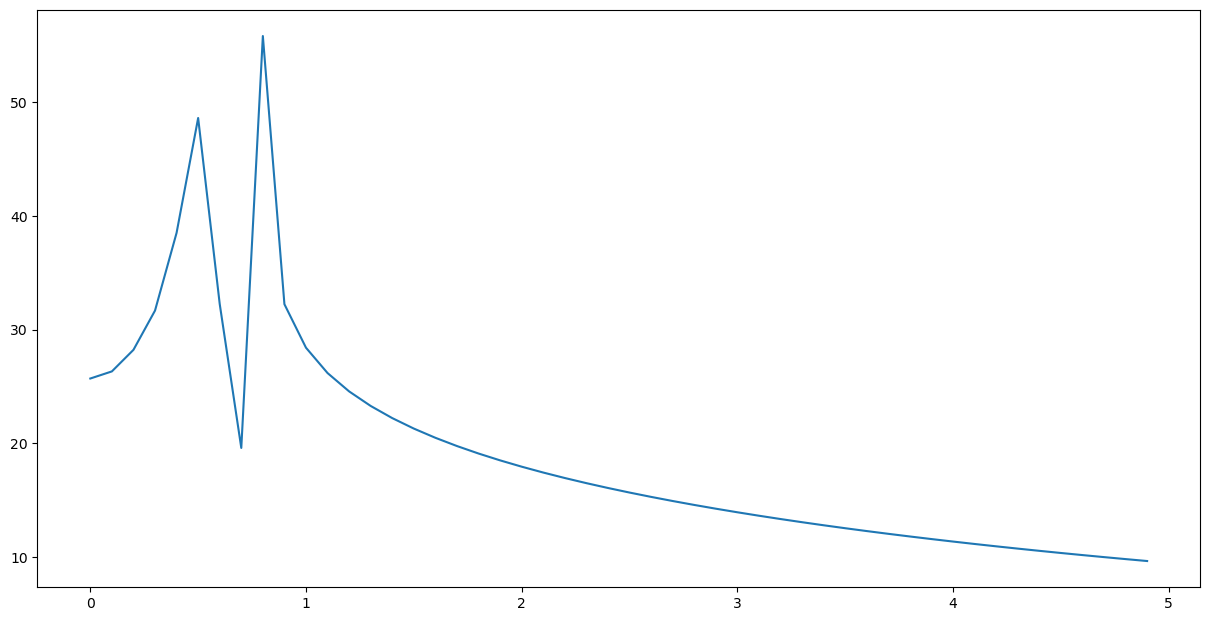

In [75]:
import numpy as np
import pylab as pl
rate = 30.0
t = np.arange(0, 10, 1/rate)
x = 2 * np.sin(3*t) + 4 * np.sin(5*t)
p = 20*np.log10(np.abs(np.fft.rfft(x)))
f = np.linspace(0, rate/2, len(p))
plot(f[:50], p[:50])